# Heart disease prediction

## Importing the libraries

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

## Loading and processing the dataset 

In [5]:
# importing the dataset
heartdisease_df = pd.read_csv('heart_uci.csv')

In [6]:
# displaying first 5 records of the dataset
heartdisease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [7]:
# displaying the number of records and attributes of the dataset
heartdisease_df.shape

(297, 14)

In [8]:
# checking for potential missing values in the dataset
# if non-null entries = 297, then no missing values
heartdisease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [9]:
# finding the statistical measures about the dataset
heartdisease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [10]:
# finding the distribution of condition variable (0 -> healthy, 1 -> heart defect)
heartdisease_df['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

## Splitting the features (attributes) from condition 

In [11]:
X = heartdisease_df.drop(columns = 'condition', axis = 1)
Y = heartdisease_df['condition']

In [12]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  
0        1   1     0  
1        0   2     0  
2        2   0    

In [13]:
print(Y)

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64


## Train Test Split 

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [15]:
# finding size of training and test data
print(X.shape, X_train.shape, X_test.shape)

(297, 13) (237, 13) (60, 13)


## Training a Logistic Regression model 

In [16]:
heart_model = LogisticRegression()

In [17]:
# training the model
heart_model.fit(X_train.values, Y_train.values)

/Users/soumyajit/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Evaluation 

In [18]:
# finding the accuracy score on training data
X_train_prediction = heart_model.predict(X_train.values)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train.values)

In [19]:
# displaying accuracy score on training data
print("Accuracy on training data: ", train_data_accuracy)

Accuracy on training data:  0.8565400843881856


In [20]:
# finding the accuracy score on test data
X_test_prediction = heart_model.predict(X_test.values)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test.values)

In [21]:
# displaying accuracy score on test data
print("Accuracy on test data: ", test_data_accuracy)

Accuracy on test data:  0.9


<Axes: >

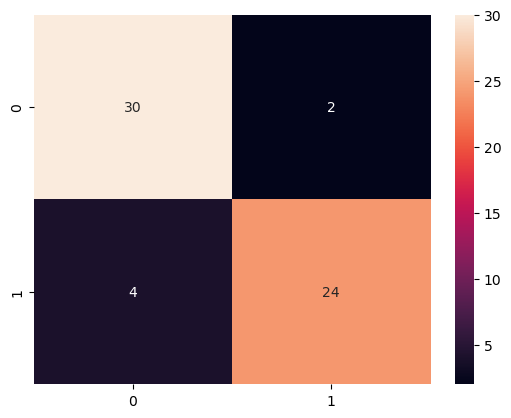

In [22]:
# displaying the confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot=True)

In [23]:
# displaying the model's performance
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        32
           1       0.92      0.86      0.89        28

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



## Building a predictive system 

In [24]:
input_data = (70,1,1,156,245,0,2,143,0,0,0,0,0)
input_np = np.asarray(input_data)
input_reshaped = input_np.reshape(1, -1)

prediction = heart_model.predict(input_reshaped)

# printing the prediction
if (prediction[0] == 0):
    print("The person does not have any heart disease")
else:
    print("The person has heart disease")

The person does not have any heart disease


## Saving the trained model

In [25]:
import pickle

In [26]:
filename = 'heart_model.sav'

In [27]:
pickle.dump(heart_model, open(filename, 'wb'))

### Made by Soumyajit Roy 